# Set2 Outliers

In [146]:
from pandas import read_csv, concat, DataFrame
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import savefig, show, subplots, figure, Axes
from ds_charts import get_variable_types, choose_grid, HEIGHT, multiple_line_chart, bar_chart
from numpy import nan

In [147]:

register_matplotlib_converters()
file = 'set2'
filename = "data/set2_air_quality_tabular.csv"
data = read_csv(filename, index_col='date', parse_dates=True, infer_datetime_format=True)
data.describe(include='all')

,FID,City_EN,Prov_EN,GbCity,GbProv,Field_1,ALARM,CO_Mean,CO_Min,CO_Max,...,PM2.5_Max,PM2.5_Std,PM10_Mean,PM10_Min,PM10_Max,PM10_Std,SO2_Mean,SO2_Min,SO2_Max,SO2_Std
count,169273.000000,169273,169273,169273.0,169273.000000,152211.000000,169273,161495.000000,161495.000000,161496.000000,...,161587.000000,161586.000000,161585.000000,161585.000000,161586.000000,161585.000000,161560.000000,161560.000000,161561.000000,161560.000000
unique,NaN,371,31,755.0,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Yichun,Shandong,6325.0,NaN,NaN,Safe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,898,13470,276.0,NaN,NaN,152305,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,38697.082228,NaN,NaN,NaN,39.986737,170.000000,NaN,0.752409,0.529502,1.123513,...,58.511675,10.978986,64.945750,37.643447,108.238486,20.043643,10.468316,6.388020,20.019479,3.657845
std,120353.768401,NaN,NaN,NaN,14.543213,97.860766,NaN,0.369792,0.246906,0.749282,...,65.257636,15.457100,78.707306,43.968002,163.648863,43.486010,7.587371,3.584805,22.740546,5.513771
min,0.000000,NaN,NaN,NaN,11.000000,1.000000,NaN,0.100000,0.100000,0.100000,...,1.000000,0.000000,1.666667,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,94.000000,NaN,NaN,NaN,32.000000,85.000000,NaN,0.529091,0.380000,0.710000,...,28.000000,4.669642,31.583333,15.000000,52.000000,8.336562,6.000000,4.000000,8.000000,0.877971
50%,188.000000,NaN,NaN,NaN,41.000000,170.000000,NaN,0.680000,0.500000,0.950000,...,44.000000,7.642966,50.458333,28.000000,81.000000,13.336198,8.375000,6.000000,13.000000,1.914401
75%,282.000000,NaN,NaN,NaN,51.000000,255.000000,NaN,0.879167,0.630000,1.300000,...,71.000000,12.875917,79.291667,48.000000,125.000000,21.604880,12.375000,8.000000,23.000000,4.183093


In [148]:
def show_boxplot(variable_name, df, suffix):
    #Charts with details about single numeric
    # numeric_vars = get_variable_types(data)['Numeric']
    numeric_vars = [variable_name]
    if [] == numeric_vars:
        raise ValueError('There are no numeric variables.')
    rows, cols = choose_grid(len(numeric_vars))
    fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
    i, j = 0, 0
    for n in range(len(numeric_vars)):
        axs[i, j].set_title(suffix + ' Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(df[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    #savefig('images/set2_outlier_imputation_' + variable_name + '_' + suffix + '.png')
    show()
def filter_interval(variable_name, max, dfOriginal, min = 0):
    df = dfOriginal.copy()
    df[variable_name] = dfOriginal[variable_name].mask(dfOriginal[variable_name].lt(min),nan)
    df[variable_name] = dfOriginal[variable_name].mask(dfOriginal[variable_name].gt(max),nan)
    return df
def std_interval(variable_name):
    min_interval = data[variable_name].mean() - 2*data[variable_name].std()
    max_interval = data[variable_name].mean() + 2*data[variable_name].std()
    return [min_interval, max_interval]

In [149]:
df = data

## CO_Mean

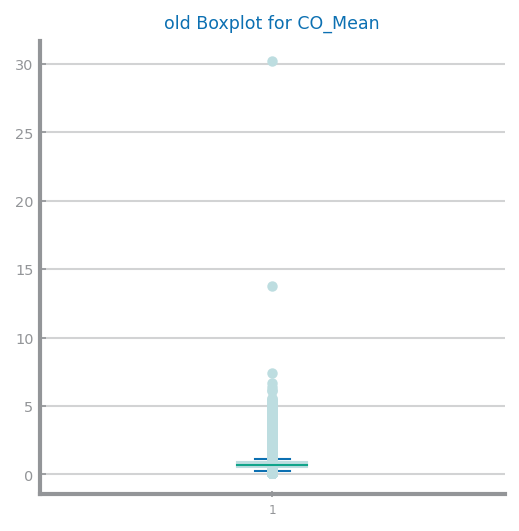

[0.012825194012492935, 1.491991911607867]


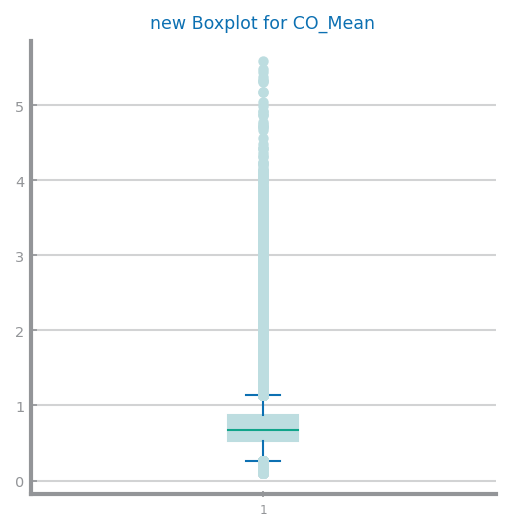

In [150]:
variable_name = 'CO_Mean'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 6
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## CO_Max

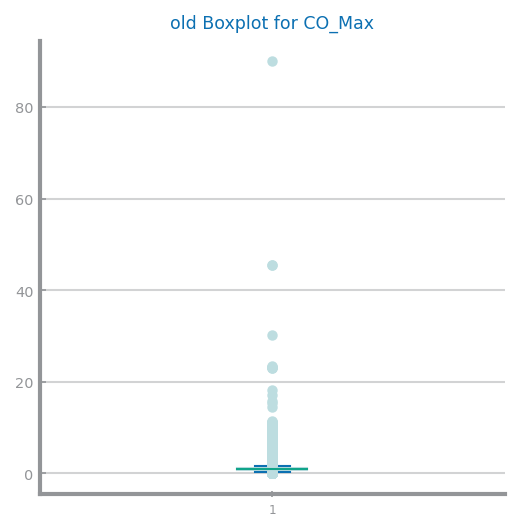

[-0.3750517023120503, 2.6220771394745808]


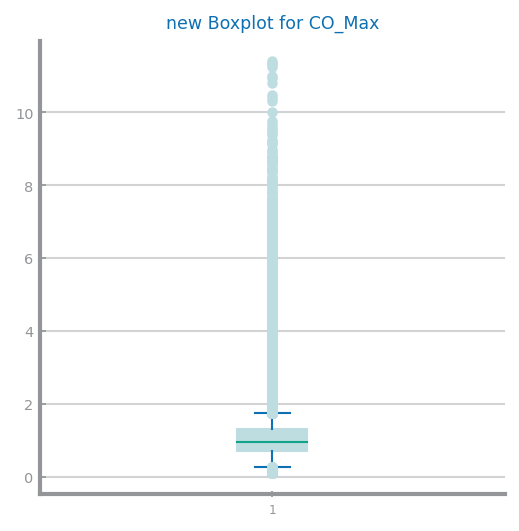

In [151]:
variable_name = 'CO_Max'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 12.5
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## CO_Std

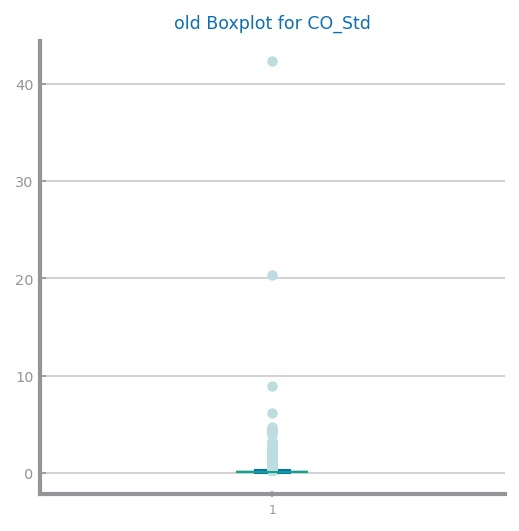

[-0.2459904204345534, 0.5792611053166488]


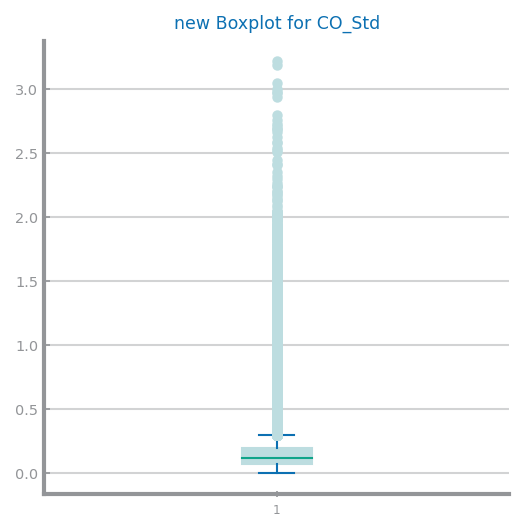

In [152]:
variable_name = 'CO_Std'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 3.5
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## NO2_Min

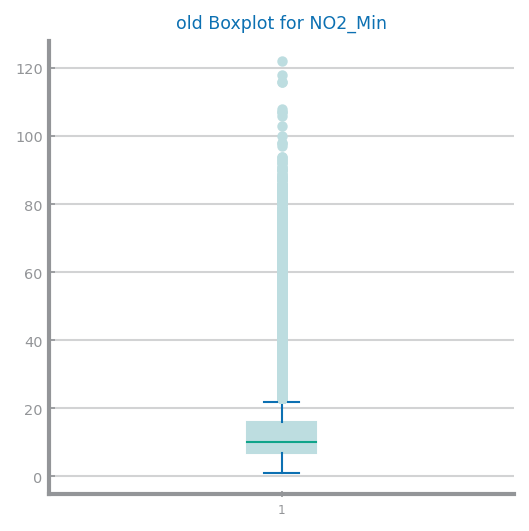

[-6.3633638949040545, 32.50620653535848]


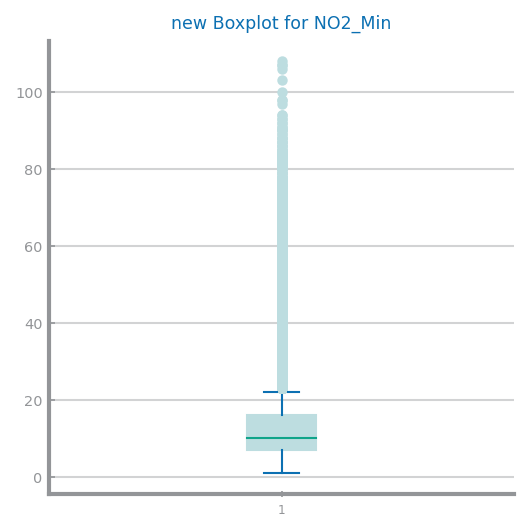

In [153]:
variable_name = 'NO2_Min'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 110
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## NO2_Max

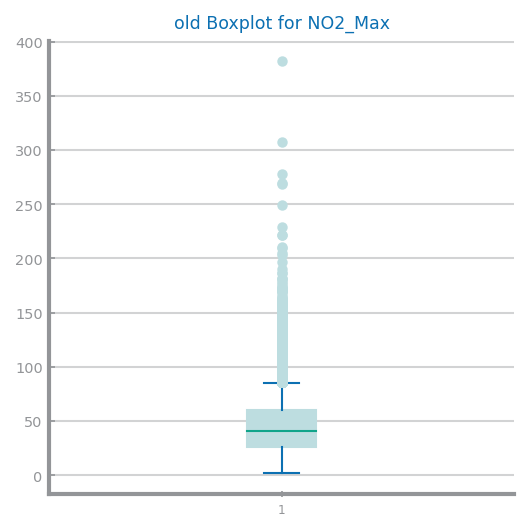

[-2.5497142604585363, 92.46862347740208]


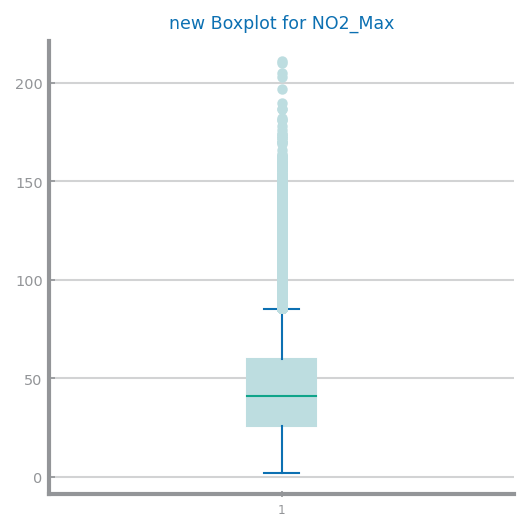

In [154]:
variable_name = 'NO2_Max'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 220
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## NO2_Std

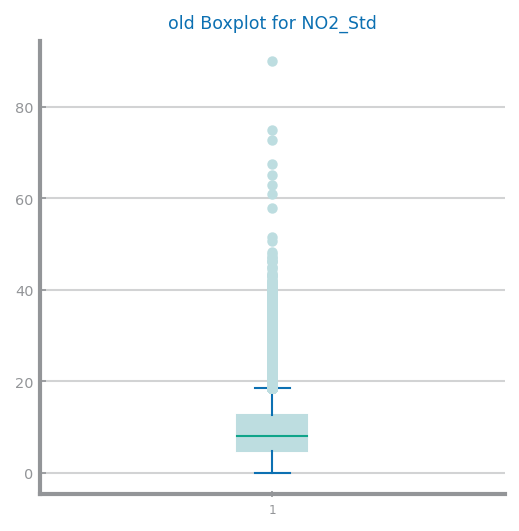

[-2.480169450202533, 21.01344762475111]


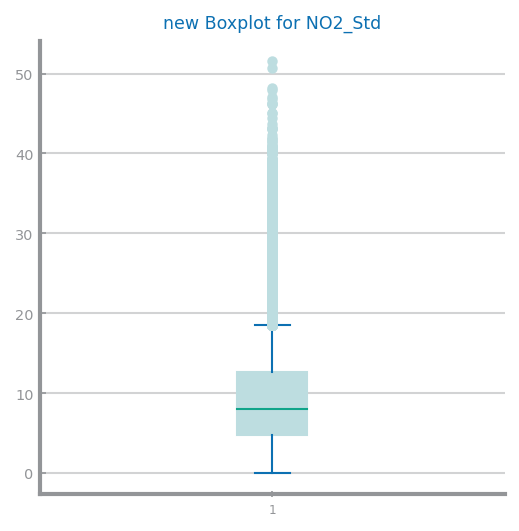

In [155]:
variable_name = 'NO2_Std'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 55
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## O3_Mean

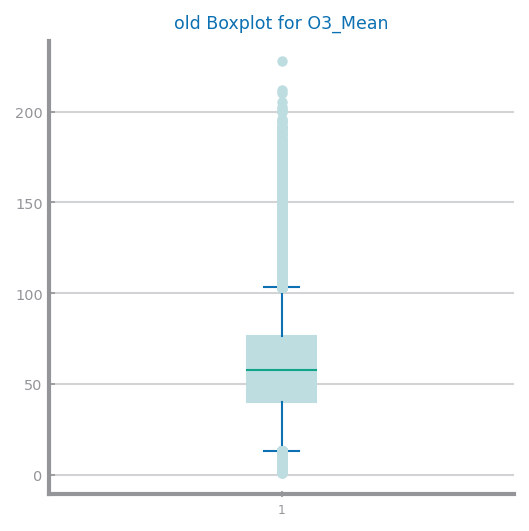

[6.312939992572993, 113.18757047784803]


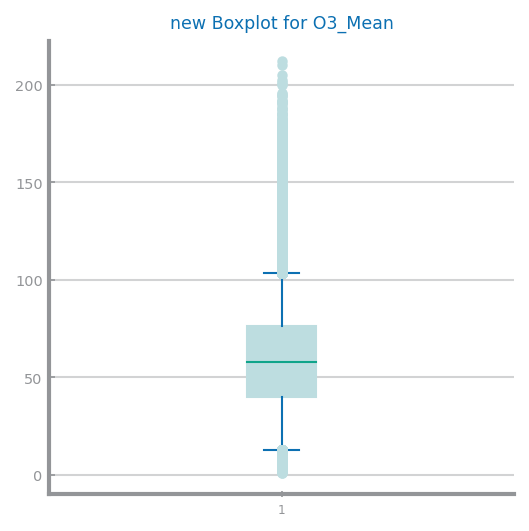

In [156]:
variable_name = 'O3_Mean'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 225
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## O3_Min

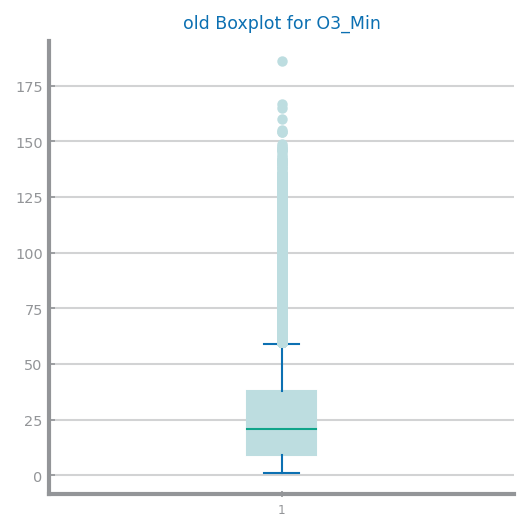

[-15.31935171456459, 67.95787949886217]


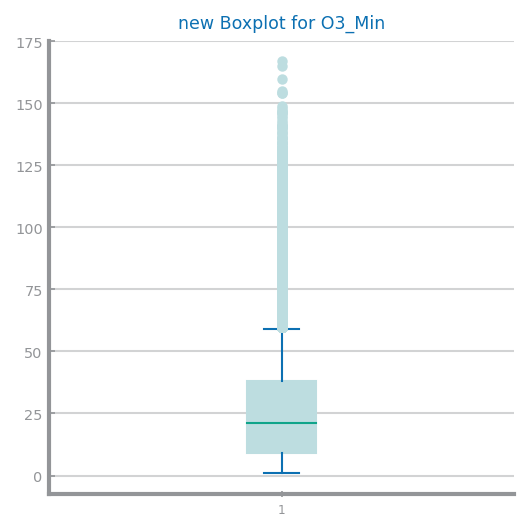

In [157]:
variable_name = 'O3_Min'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 175
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## O3_Max

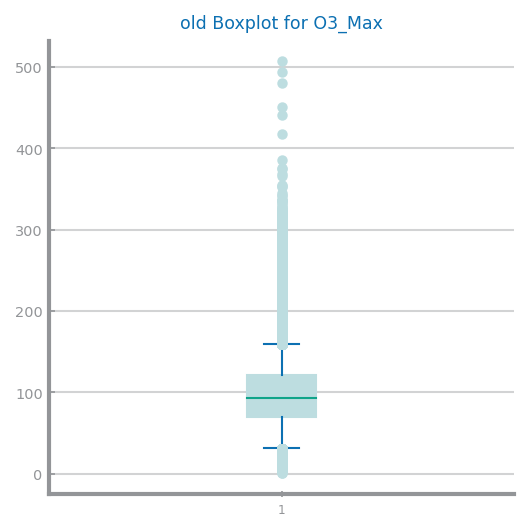

[16.00446316287318, 181.7767773574049]


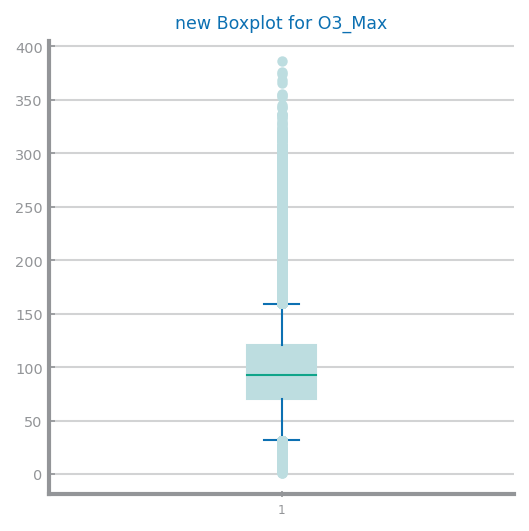

In [158]:
variable_name = 'O3_Max'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 400
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## O3_Std

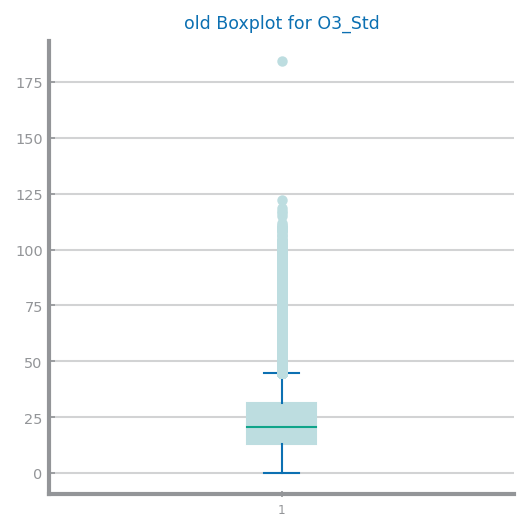

[-4.974466546632204, 52.11684529159818]


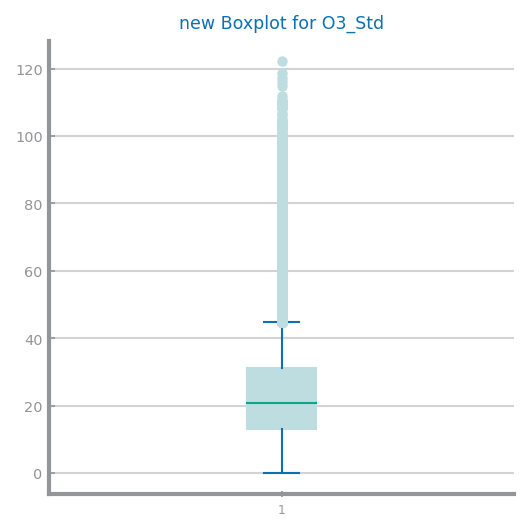

In [159]:
variable_name = 'O3_Std'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 150
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## PM2.5_Mean

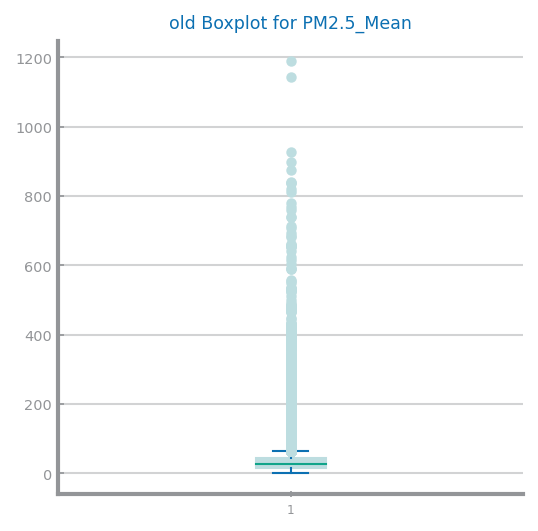

[-30.75573616089757, 102.87572435682155]


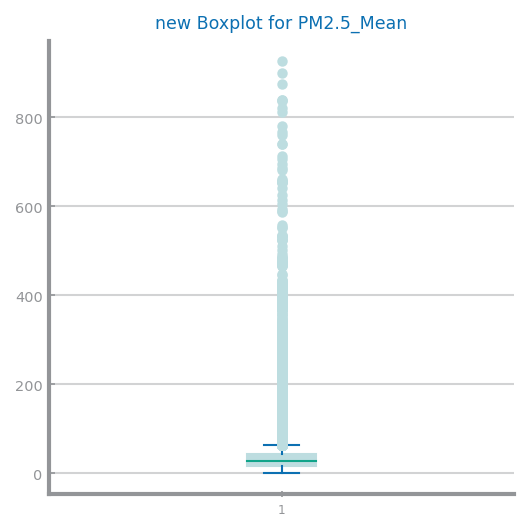

In [160]:
variable_name = 'PM2.5_Mean'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 1000
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## PM2.5_Min

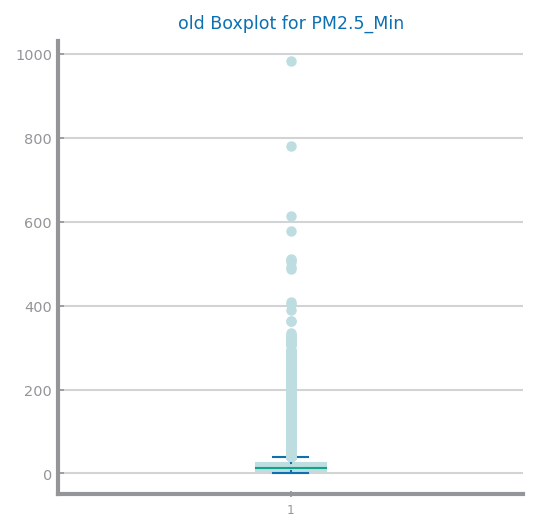

[-24.085550483121057, 65.35765671739247]


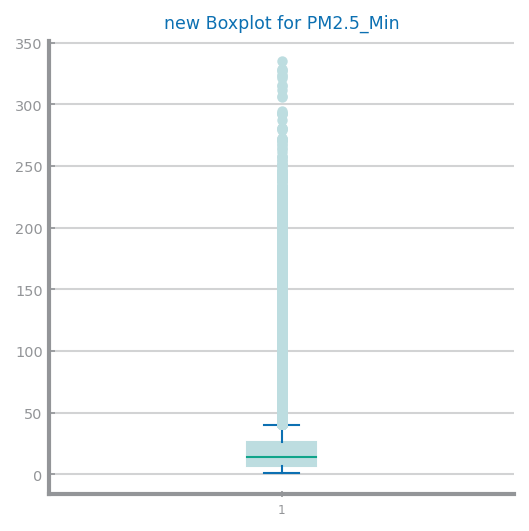

In [161]:
variable_name = 'PM2.5_Min'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 350
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## PM2.5_Max

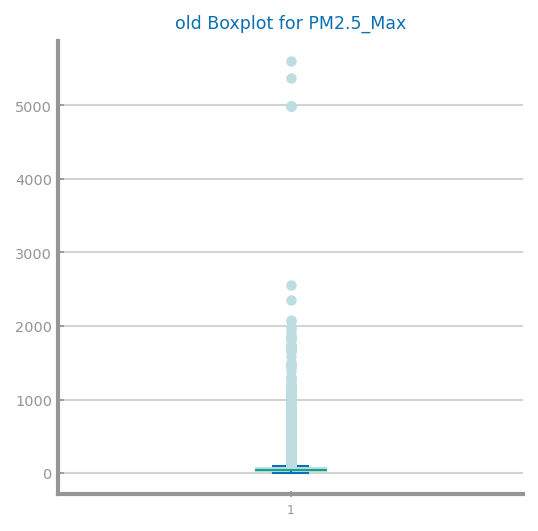

[-72.00359651583945, 189.02694616649205]


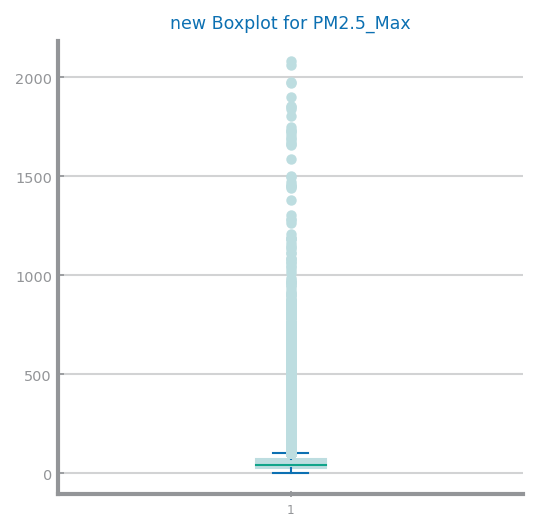

In [162]:
variable_name = 'PM2.5_Max'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 2250
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## PM2.5_Std

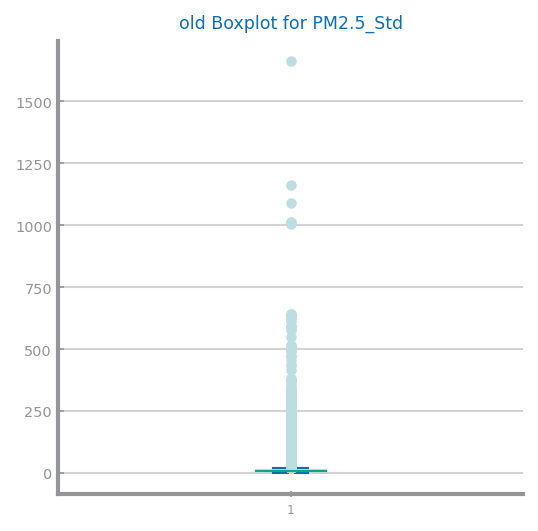

[-19.935214457483895, 41.89318653338945]


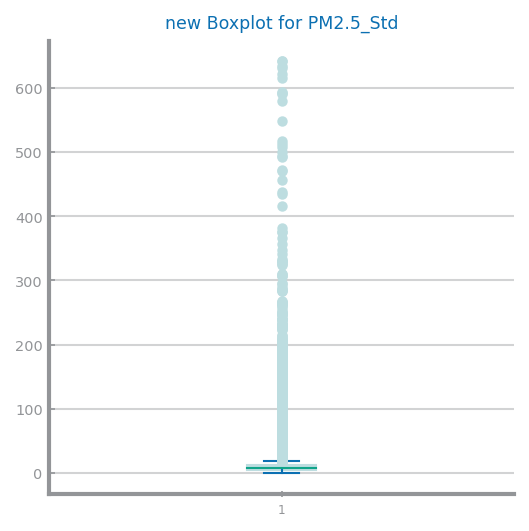

In [163]:
variable_name = 'PM2.5_Std'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 750
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## PM10_Mean

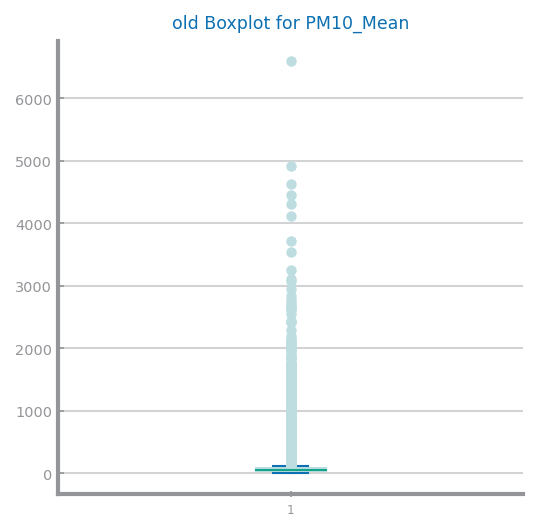

[-92.46886273660954, 222.36036260881144]


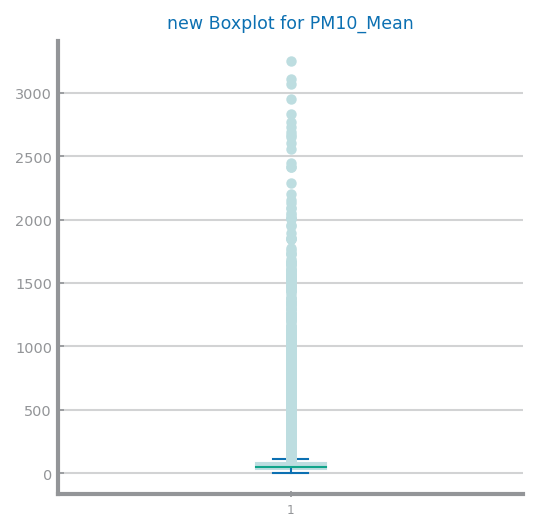

In [164]:
variable_name = 'PM10_Mean'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 3500
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## PM10_Min

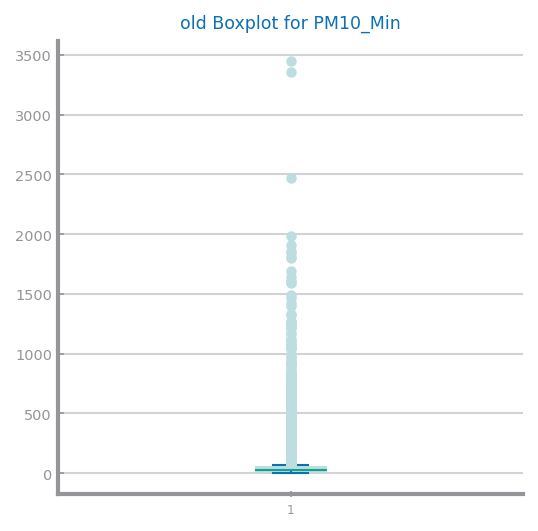

[-50.29255625779904, 125.57945037688114]


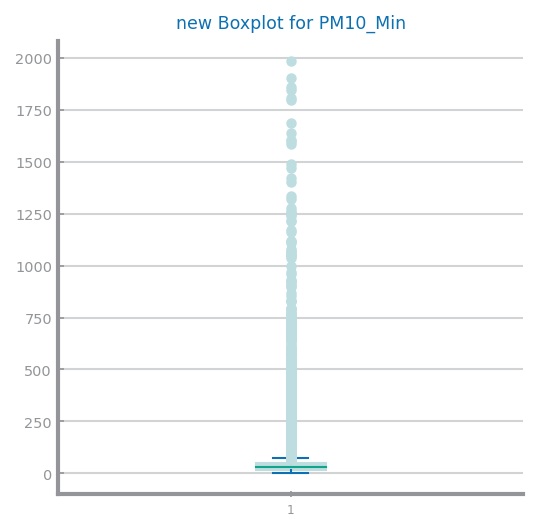

In [165]:
variable_name = 'PM10_Min'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 2250
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## PM10_Max

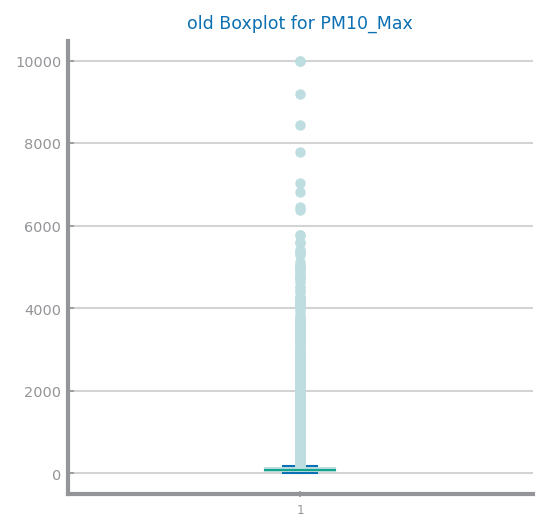

[-219.05924096027903, 435.53621297518134]


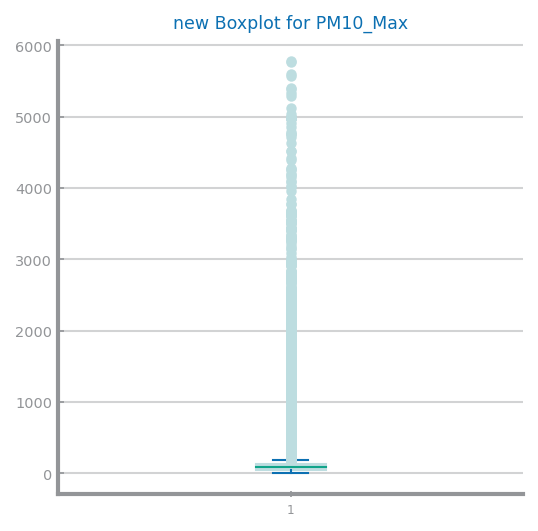

In [166]:
variable_name = 'PM10_Max'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 6000
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## PM10_Std

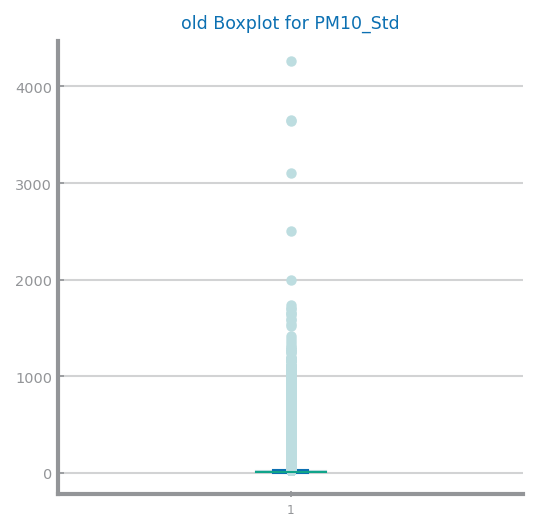

[-66.92837651000531, 107.0156624890979]


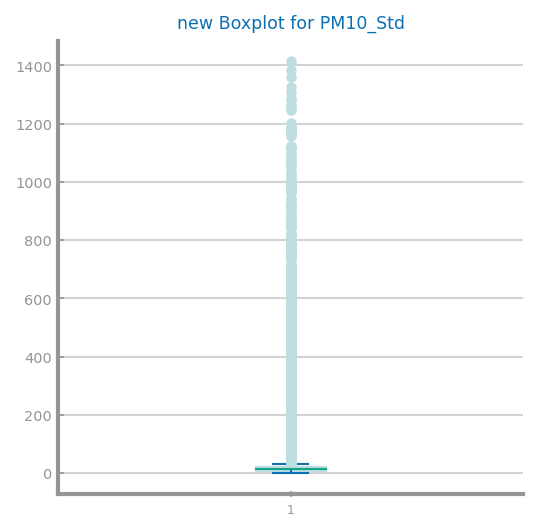

In [167]:
variable_name = 'PM10_Std'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 1500
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## SO2_Min

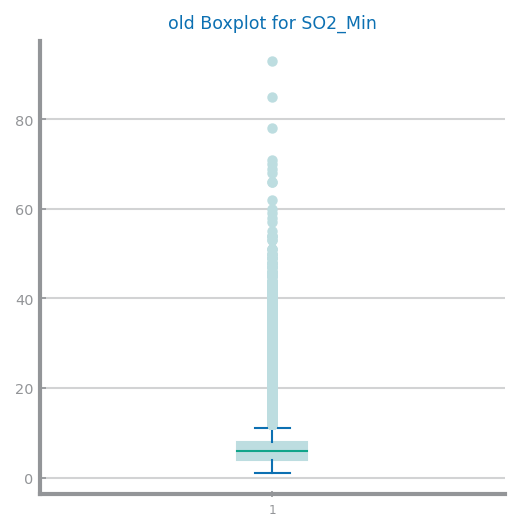

[-0.7815908661202755, 13.557630862029697]


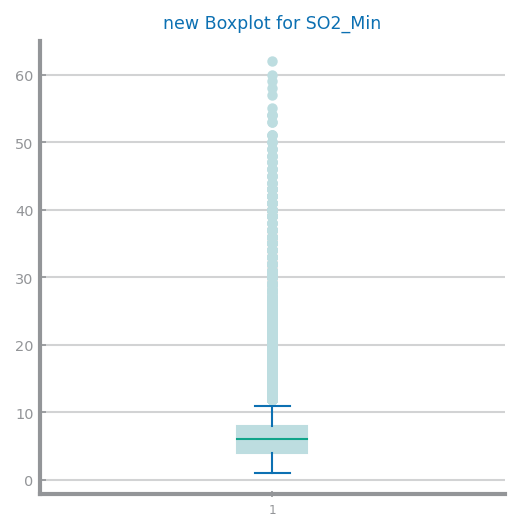

In [168]:
variable_name = 'SO2_Min'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 65
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## SO2_Mean

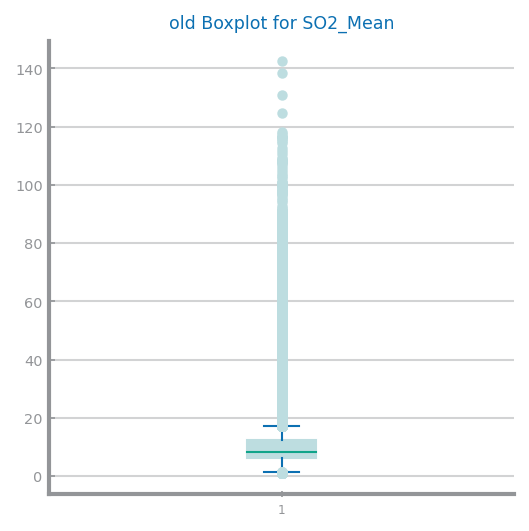

[-4.7064253737090045, 25.643056944818603]


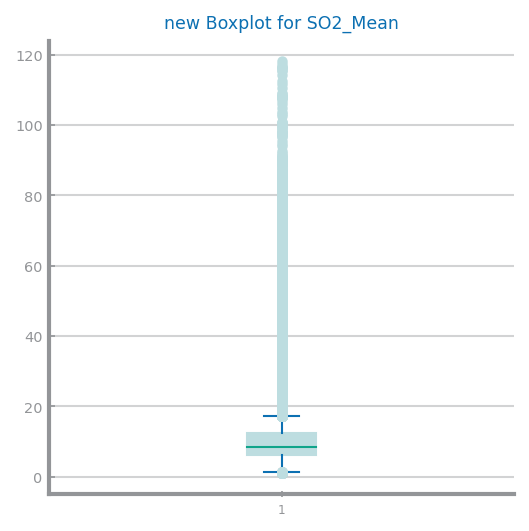

In [169]:
variable_name = 'SO2_Mean'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 120
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## SO2_Max

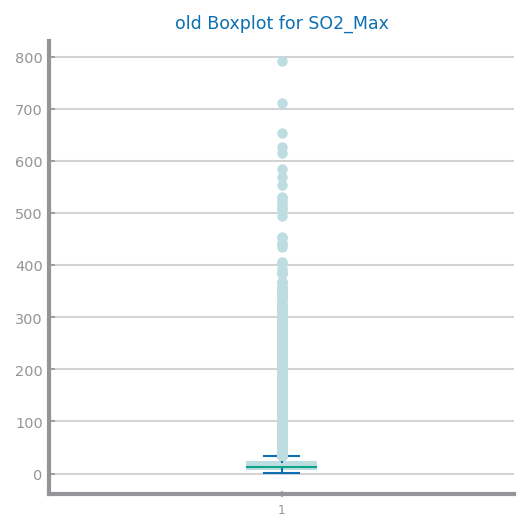

[-25.461613268891586, 65.50057069054657]


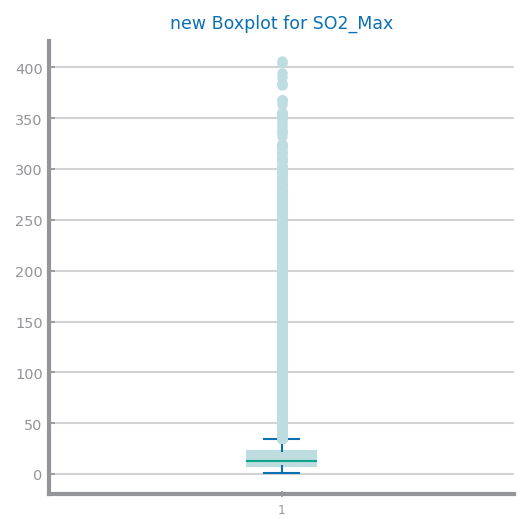

In [170]:
variable_name = 'SO2_Max'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 420
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

## S02_Std

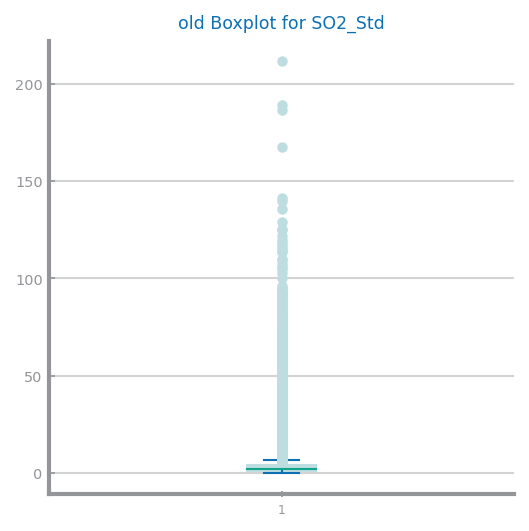

[-7.369697223101332, 14.685387570280001]


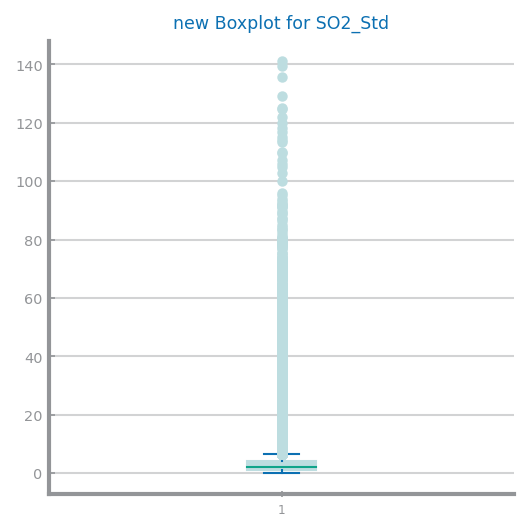

In [171]:
variable_name = 'SO2_Std'
show_boxplot(variable_name, data, 'old')
print(std_interval(variable_name))
max_value = 150
df = filter_interval(variable_name, max_value, df)
show_boxplot(variable_name, df, 'new')

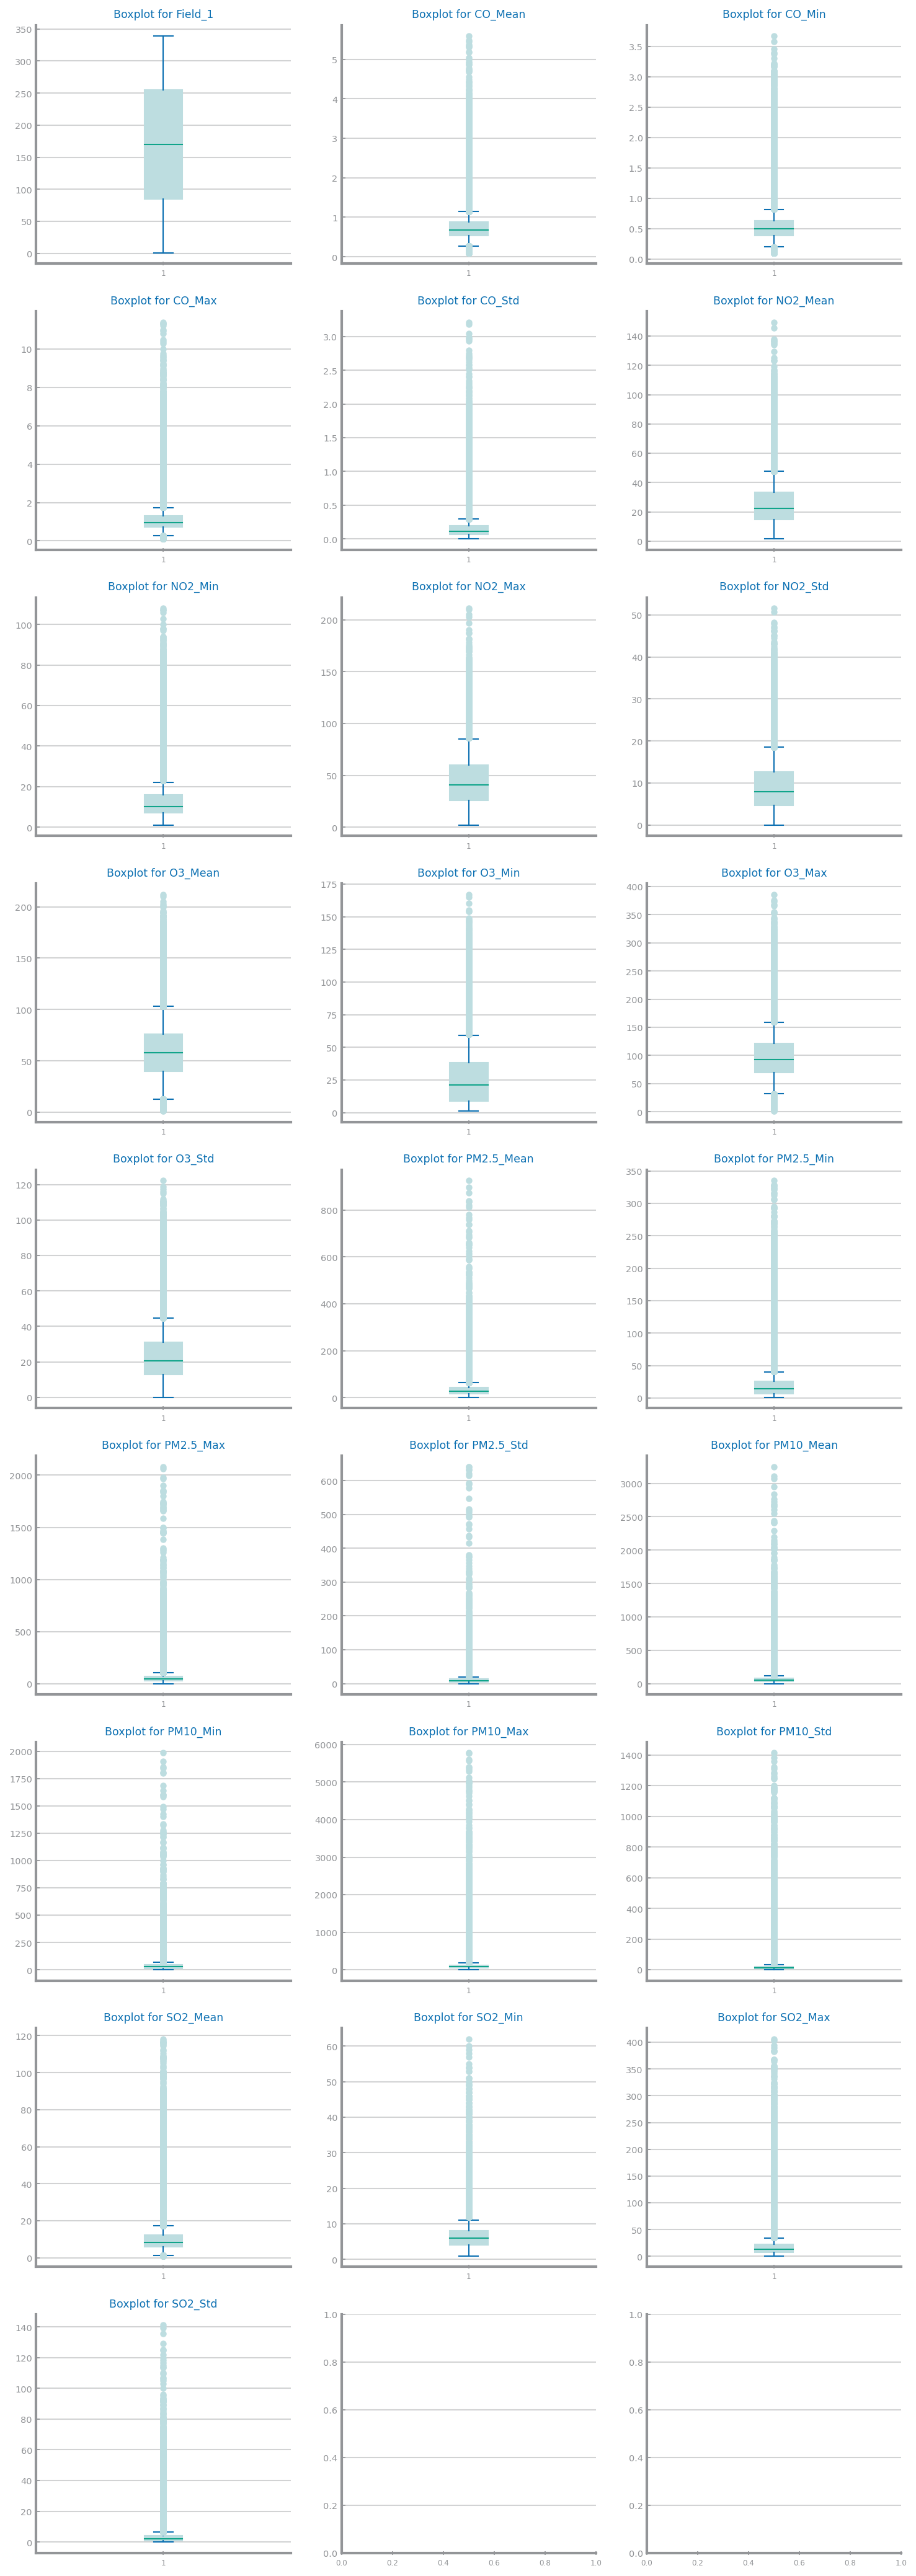

In [177]:
#Charts with details about single numeric
numeric_vars = get_variable_types(data)['Numeric']
numeric_vars.remove('FID')
numeric_vars.remove('GbProv')
if [] == numeric_vars:
    raise ValueError('There are no numeric variables.')
rows, cols = choose_grid(len(numeric_vars))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
fig.patch.set_facecolor('white')
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(df[numeric_vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
savefig('images/set2_outliers_new.png')
show()

In [175]:
df.to_csv(f'new_data/{file}_outliers.csv', index=True)